In [14]:
# Loan Application Classification using Logistic Regression

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
# Step 2: Load dataset
# Replace with your dataset path
df = pd.read_csv("loan_data.csv")

In [16]:
# Step 3: Explore dataset
print("First 5 rows:")
print(df.head())

First 5 rows:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0         128               360   
1             4583               1508         128               360   
2             3000                  0          66               360   
3             2583               2358         120               360   
4             6000                  0         141               360   

   Credit_History Gender Married     Education Self_Employed Property_Area  \
0               1   Male      No      Graduate            No         Urban   
1               1   Male     Yes      Graduate            No         Rural   
2               1   Male     Yes      Graduate           Yes         Urban   
3               1   Male     Yes  Not Graduate            No         Urban   
4               1   Male     Yes      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4         

In [22]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ApplicantIncome    20 non-null     int64
 1   CoapplicantIncome  20 non-null     int64
 2   LoanAmount         20 non-null     int64
 3   Loan_Amount_Term   20 non-null     int64
 4   Credit_History     20 non-null     int64
 5   Gender             20 non-null     int32
 6   Married            20 non-null     int32
 7   Education          20 non-null     int32
 8   Self_Employed      20 non-null     int32
 9   Property_Area      20 non-null     int32
 10  Loan_Status        20 non-null     int32
dtypes: int32(6), int64(5)
memory usage: 1.4 KB
None


In [18]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64


In [6]:
# Step 4: Handle missing values (if any)
df = df.dropna()

In [21]:
# Step 5: Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [23]:
# Step 6: Define features (X) and target (y)
# Assuming "Loan_Status" is the target column
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [24]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
# Step 8: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Step 9: Build Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 10: Predictions
y_pred = model.predict(X_test)

# Step 11: Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\ARATI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARATI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ARATI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

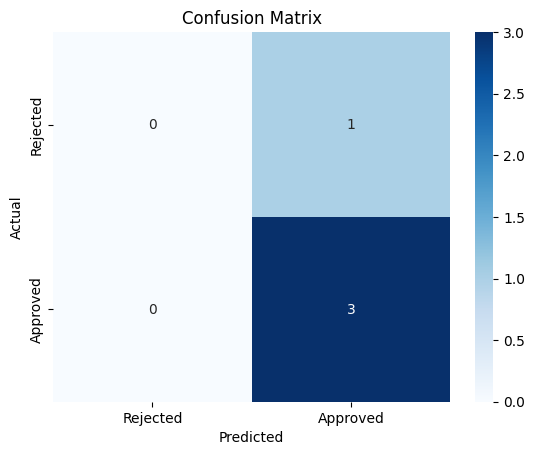

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()